<a href="https://colab.research.google.com/github/waltechel/202209-novice-nlp-with-python/blob/master/Ch%2007.%20%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7. 토픽 모델링으로 주제 찾기

이 장에서는 토픽 모델링 알고리즘 중에 가장 널리 쓰이는 LDA(Latent Dirichlet Allocation) 기법을 중심으로 토픽 모델링에 대해 이해하고 실습하고자 한다.

## 7.1 토픽 모델링과 LDA의 이해

### 7.1.1 토픽 모델링이란?
단어 빈도에서는 막연했던 내용들이 주제 분석에서는 외교, 육아, 주택, 일자리, 범죄 등으로 구체화된다. 토픽 모델링은 바로 이와 같은 '내재된 주제의 분석' 을 가능하게 하는 기법이다. 더불어 이러한 주제들이 시간에 따라 어떻게 변화했는지를 살펴보는 '토픽 트렌드' 분석을 할수도 있다.

### 7.1.2 LDA 모형의 구조
LDA의 기본 가정은, 문서들이 쓰여질 때 그 문서를 구성하는 몇 개의 토픽이 존재하며 각 토픽은 단어의 집합으로 구성됐다는 것이다. 그러나 이상과 같은 내용은 가정일 뿐, 각 문서에서 토픽이 무엇이고 각 토픽은 어떤 단어들로 이루어졌다는 사실이 명시적으로 드러나지는 않는다. 그래서 '내재된 혹은 함의된 주제 혹은 토픽' 이라고 부르며, LDA는 이와 같이 내재한 토픽을 유추하고자 하는 통계 방법론이라고 설명할 수 있다.

먼저 토픽 모델링은 전체 문서에 공통적으로 내재한 토픽들을 식별한다. 즉 각 문서가 개별적으로 전혀 다른 토픽들로 구성되는 것이 아니고 전체 말뭉치를 관통하는 토픽들이 있으며 문서는 이러한 공통적인토픽들이 다양한 비중으로 결합된 것으로 무서에 따른 토픽의 확률분포를 추정하는 것이 토픽 모델링의 첫째 목적이 된다.

디리클레 분포는 연속 확률분포의 하나이며, k 차원의 실수 벡터에서 각 벡터 값이 양수이고 모든 값을 더하면 1이 되는 경우에 대해 확률값이 정의되는 분포다. 우리는 문서의 토픽 분포가 디리클레 분포를 따른다고 가정하는 것이다. 

토픽 모델링의 둘째 목표는 각 토픽의 단어분포를 알아내는 것이다. 어떤 문서에 사용된 단어의 분포는 이 문서에 잠재된 토픽에 의해 결정되는데, 각 토픽은 단어의 분포이므로 이것들이 결합되어 문서에 사용된 단어의 분포가 된다는 것이다. 

토픽의 개수 K와 a, b는 하이퍼 파라미터로, 사용자가 가정하여 값을 주고 LDA를 실행하게 된다. 따라서 적절한 토픽 수, a, b를 설정함으로써 토픽 모델링의 성능을 높일 수 있다. 

### 7.1.3 모형의 평가와 적절한 토픽 수의 결정

토픽 모형의 성능을 평가할 때 무엇보다 중요한 점이 있는데, 혼란도나 토픽 응집도와 같은 척도의 수치보다, 토픽의 해석이 사람이 보기에 자연스러운 것이 더 중요하다는 것이다. 

## 7.2 사이킷런을 이용한 토픽 모델링

### 7.2.1 데이터 준비

여기서는 좀 더 다양한 토픽들을 살펴보기 위해 여섯 개로 카테고리를 늘렸다.

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3219
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


특성 수를 2000개로 제한하고 min_df와 max_df를 각각 5와 0.5로 변환해서 사용한다.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data) 
print(review_cv)

  (0, 1026)	5
  (0, 1657)	3
  (0, 1978)	3
  (0, 1618)	4
  (0, 357)	3
  (0, 932)	3
  (0, 1335)	1
  (0, 159)	1
  (0, 1204)	1
  (0, 1352)	1
  (0, 833)	1
  (0, 142)	1
  (0, 728)	1
  (0, 271)	2
  (0, 947)	2
  (0, 291)	1
  (0, 84)	1
  (0, 1572)	2
  (0, 48)	3
  (0, 1273)	1
  (0, 1461)	1
  (0, 1152)	9
  (0, 1153)	9
  (0, 102)	5
  (0, 1568)	2
  :	:
  (3218, 803)	1
  (3218, 1919)	1
  (3218, 191)	2
  (3218, 349)	2
  (3218, 1854)	3
  (3218, 455)	1
  (3218, 254)	1
  (3218, 136)	1
  (3218, 1797)	1
  (3218, 1294)	1
  (3218, 1344)	1
  (3218, 1353)	1
  (3218, 622)	1
  (3218, 1513)	1
  (3218, 1199)	1
  (3218, 82)	1
  (3218, 1065)	1
  (3218, 580)	1
  (3218, 442)	2
  (3218, 44)	1
  (3218, 1839)	1
  (3218, 1679)	2
  (3218, 620)	1
  (3218, 530)	1
  (3218, 863)	2


### 7.2.2 LDA 토픽 모델링 실행

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, # 반복 횟수
                                topic_word_prior=0.1, doc_topic_prior=1.0, # a, b 일반적으로 a는 0.1, b는 1/n_component를 주는데 여기는 1을 준다.
                                learning_method='online', 
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
# 첫째 토픽의 비중이 압도적으로 크고 나머지는 대동소이하다.
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
# 문서 전체에 나타난 토픽의 평균 분포를 알 수 있다.
print('#Sum of topic weights of documents:', gross_topic_weights)
print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (3219, 10)
#Sample of review_topics: [0.901 0.007 0.029 0.008 0.007 0.008 0.008 0.007 0.007 0.019]
#Sum of topic weights of documents: [0.09  0.083 0.081 0.114 0.117 0.136 0.085 0.072 0.072 0.151]
#shape of topic word distribution: (10, 2000)


토픽의 내용을 파악하려고 모든 단어의 비중을 들여다보는 것은 사실상 불가능하므로, 보통은 가장 비중이 높은 단어 10~20개 정도를 본다. 토픽별로 비중이 높은 상위 단어들을 찾아 순서대로 출력하기 위해 아래와 같이 print_top_words를 정의하고 위 결과에 적용해보았다. 

평가에 대해서 한번 더 언급하자면 혼란도나 토픽 응집도와 같은 수치에 전적으로 의존하기보다 사람의 판단이 중요하다고 이야기한 것이 바로 이와 같은 맥락이다. 성능상으로 좋은 수치를 보인다 해도 토픽을 해석하기가 어렵다면 좋은 결과라고 하기 어렵다.

In [7]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, caltech, objective, moral
Topic #1: image, graphics, file, files, ftp, available, software, use, data, pub
Topic #2: space, access, launch, earth, orbit, digex, lunar, shuttle, satellite, com
Topic #3: article, com, just, like, don't, university, i'm, nntp, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, posting, nntp, host, thanks, bit, university, ibm, know
Topic #6: nasa, gov, university, host, posting, nntp, ___, distribution, center, washington
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, problem, floppy
Topic #8: key, public, mail, faq, message, pgp, group, des, posting, university
Topic #9: god, people, don't, jesus, just, believe, say, does, think, know




### 7.2.3 최적의 토픽 수 선택하기

사이킷런은 혼란도만 공식적으로 제공한다. 토픽 응집도를 알고 싶다면 아직까지는 직접 계산해야 한다.
계산해보면 토픽의 수가 8일 때 다른 값에 비해 perplexity가 낮은 것을 알 수 있다.


n_components: 6, perplexity: 1063.362
n_components: 7, perplexity: 1045.636
n_components: 8, perplexity: 1015.561
n_components: 9, perplexity: 1016.494
n_components: 10, perplexity: 1028.560
n_components: 11, perplexity: 1036.692
n_components: 12, perplexity: 1032.437
n_components: 13, perplexity: 1038.319
n_components: 14, perplexity: 1040.664
n_components: 15, perplexity: 1046.556


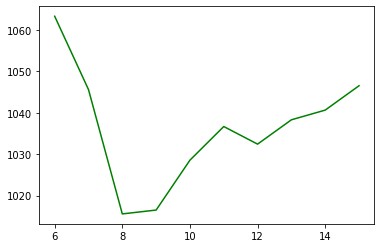

n_components with minimum perplexity: 8


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, 
                                        max_iter=max_iter, 
                                        topic_word_prior=topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', # online 옵션보다 느리지만 성능이 좋게 나옴
                                        n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [9]:
lda = LatentDirichletAllocation(n_components = 8, #추출할 topic의 수를 지정
                                max_iter=20, 
                                topic_word_prior= 0.1, 
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1, 
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, graphics, mail, available, file, ftp, data, files, software, information
Topic #1: nasa, gov, posting, space, university, host, nntp, ___, center, distribution
Topic #2: com, keith, article, morality, think, posting, nntp, caltech, don't, host
Topic #3: com, article, jesus, know, just, posting, host, nntp, don't, i'm
Topic #4: people, god, does, don't, think, say, believe, just, way, like
Topic #5: drive, scsi, card, com, disk, thanks, ide, controller, bus, hard
Topic #6: space, access, article, launch, just, year, like, digex, moon, com
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public



## 7.3 Gensim을 이용한 토픽 모델링


### 7.3.1 Gensim 사용법과 시각화

In [14]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [10]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 13.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [15]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]
print("texts", len(texts))

texts 3219


In [23]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionary 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 46466
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [24]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, \
                       id2word=dictionary,\
                       passes=passes, \
                       num_topics=num_topics, \
                       random_state=7)

CPU times: user 14.3 s, sys: 210 ms, total: 14.5 s
Wall time: 14.2 s


사이킷런에서는 각 토픽의 상위 비중 단어를 보기 위해 직접 함수를 만들었다. num_words로 각 토픽의 상위 단어 수를 지정할 수 있다. 보통은 num_words만 사용한다.

In [25]:
model.print_topics(num_words=10)

[(0,
  '0.023*"com" + 0.018*"keith" + 0.016*"caltech" + 0.013*"sgi" + 0.013*"nntp" + 0.013*"posting" + 0.013*"host" + 0.012*"would" + 0.012*"system" + 0.011*"livesey"'),
 (1,
  '0.020*"morality" + 0.018*"objective" + 0.015*"one" + 0.015*"say" + 0.014*"uiuc" + 0.012*"frank" + 0.012*"values" + 0.010*"faq" + 0.010*"article" + 0.008*"cso"'),
 (2,
  '0.026*"com" + 0.025*"access" + 0.025*"posting" + 0.023*"host" + 0.023*"nntp" + 0.017*"digex" + 0.015*"article" + 0.013*"cwru" + 0.013*"___" + 0.013*"net"'),
 (3,
  '0.021*"university" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.013*"article" + 0.010*"com" + 0.009*"know" + 0.009*"i\'m" + 0.009*"would" + 0.009*"thanks"'),
 (4,
  '0.032*"com" + 0.015*"would" + 0.011*"article" + 0.010*"one" + 0.010*"get" + 0.009*"people" + 0.009*"ibm" + 0.008*"government" + 0.007*"good" + 0.007*"i\'m"'),
 (5,
  '0.025*"key" + 0.017*"encryption" + 0.014*"clipper" + 0.014*"chip" + 0.009*"keys" + 0.009*"use" + 0.008*"security" + 0.008*"government" + 0.008*"pub

In [26]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.72576934), (8, 0.2699505)]


In [28]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d76052b5b9308bf4606bc8a5040d410be2e50a3d02648ea9bd6ca07016f4bbc3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=390c5da24a1d91d8e4dc05a30140c04c67448fff93045131d51d256870b0d2b0
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [29]:
import pyLDAvis
# 시각화 모듈의 이름이 import pyLDAvis.gensim_models 로 변경되었다는 점에 주의한다.
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.137200  0.040249       1        1  22.655416
5      0.065990  0.123620       2        1  14.522776
9      0.072133  0.092872       3        1  12.987437
7      0.138320  0.043609       4        1  11.020437
4     -0.021828  0.007495       5        1   9.298365
6      0.072783 -0.094709       6        1   9.118869
3      0.027374 -0.054949       7        1   8.494165
0     -0.040786 -0.129974       8        1   4.524071
2      0.005359 -0.091972       9        1   4.051827
1     -0.182144  0.063761      10        1   3.326637, topic_info=            Term         Freq        Total Category  logprob  loglift
538        space  1487.000000  1487.000000  Default  30.0000  30.0000
20           com  3752.000000  3752.000000  Default  29.0000  29.0000
834          key  1316.000000  1316.000000  Default  28.0000  28.0000
1551        scsi   741.000000   741.000000  Default  27.0000  27.0000
70       posting  1723.000000  1723.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
65        people    64.445774  1672.571326  Topic10  -5.1558   0.1469
789          sci    53.265337   309.474053  Topic10  -5.3463   1.6436
602   university    56.862740  1487.218103  Topic10  -5.2810   0.1392
294         time    55.767882  1187.715297  Topic10  -5.3004   0.3446
315       better    54.193100   564.543676  Topic10  -5.3290   1.0597

[592 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      1  0.006274      128
1359      2  0.069013      128
1359      3  0.037643      128
1359      4  0.878342      128
153       1  0.057463     1993
...     ...       ...      ...
343       8  0.022394    years
343       9  0.005599    years
343      10  0.121303    years
704       3  0.991487      zoo
705       3  0.984036  zoology

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 8, 5, 7, 4, 1, 3, 2])

### 7.3.2 혼란도와 토픽 응집도를 이용한 최적값 선택

In [31]:
from gensim.models import CoherenceModel

# 인수로 corpus를 넘겨줘야 하지만 coherence를 계산할 수 있다. 이는 앞서 응집도를 계산할 수 없던 것과 반대된다.
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7493528544065975


사이킷런에서 수행했듯이 혼란도와 응집도를 이용해 최적의 토픽 수를 결정하는 예를 실습한다. 지정된 토픽 수의 범위에 따라 LDA 모델을 학습하고, 이 모델에 대해 혼란도와 토픽 응집도를 계산해 그래프로 그리는 것으로 다음과 같이 함수로 구현했다. 

실행 결과를 보면 토픽 모델링을 최적화하는 것이 쉽지 않음을 알 수 있다. 우선 혼란도는 낮을 수록 좋고 응집도는 높을 수록 좋은데 두 척도가 모두 최상인 토픽의 수는 없다. 경우의 수를 모두 해보고 해석이 더 좋은 것을 선택하는 것도 대안이 될 수 있다.

num_topics: 6, perplexity: -7.035, coherence: -1.701


num_topics: 7, perplexity: -7.023, coherence: -1.735


num_topics: 8, perplexity: -7.023, coherence: -1.547


num_topics: 9, perplexity: -7.007, coherence: -1.891


num_topics: 10, perplexity: -6.996, coherence: -1.888


num_topics: 11, perplexity: -7.027, coherence: -2.164


num_topics: 12, perplexity: -7.019, coherence: -2.018


num_topics: 13, perplexity: -7.025, coherence: -2.255


num_topics: 14, perplexity: -7.020, coherence: -2.082
num_topics: 15, perplexity: -7.019, coherence: -2.521


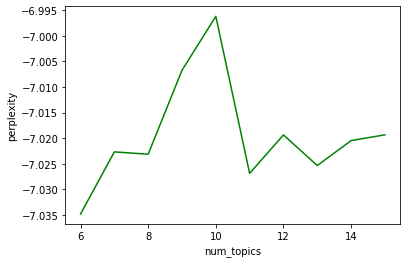

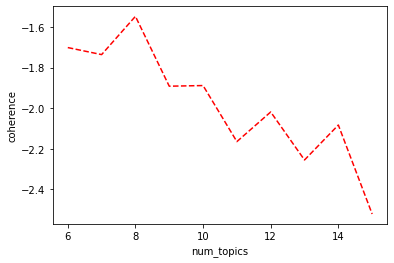

In [32]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

## 7.4 토픽트렌드로 시간에 따른 주제의 변화 알아내기

1: https://github.com/akngs/petitions

In [33]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b19d03b1a782c6ed2915fe966bdccfcf1d5d57f12e9646ddeee80fe43f630c18
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [34]:
import os
import wget
import ssl

data_dir = 'data'
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'
ssl._create_default_https_context = ssl._create_unverified_context

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

wget.download(url, data_dir)

'data/petition_sampled.csv'

In [35]:
import pandas as pd

df = pd.read_csv("./data/petition_sampled.csv") #read data
df.iloc[[2]]

,article_id,start,end,answered,votes,category,title,content
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [36]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 11.1 MB/s 
     |████████████████████████████████| 453 kB 77.9 MB/s 


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twit = Okt()

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      max_df=0.5, 
                      min_df = 5, 
                      max_features = 1000) #적당한 대상 단어 수를 선택

pet_cv = vec.fit_transform(df.content)
print(pet_cv.shape)

(18077, 1000)


In [38]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 15, \
                                n_jobs= -1, \
                                random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_top_words(lda,vec.get_feature_names(), 15)

CPU times: user 2.15 s, sys: 191 ms, total: 2.34 s
Wall time: 1min 46s
Topic #0: 사람, 생각, 병원, 대통령, 피해자, 국민, 사건, 정말, 가족, 나라, 환자, 자신, 인간, 지금, 의사
Topic #1: 북한, 우리, 한국, 대통령, 정부, 국민, 대한민국, 미국, 일본, 문재인, 국가, 문제, 생각, 나라, 우리나라
Topic #2: 아이, 부모, 어린이집, 생각, 교사, 엄마, 우리, 유치원, 자녀, 가정, 동물, 출산, 아빠, 문제, 지원
Topic #3: 청소년, 불법, 폐지, 보호, 장애인, 조직, 사찰, 생각, 외국인, 이용, 노인, 사회, 나이, 범죄, 사람
Topic #4: 정부, 주택, 정책, 국민, 부동산, 서민, 아파트, 나라, 대통령, 세금, 지금, 사람, 투기, 집값, 임대
Topic #5: 일자리, 기업, 근무, 정부, 생각, 근로자, 지원, 임금, 최저임금, 시간, 정책, 회사, 직원, 대기업, 고용
Topic #6: 국민, 청원, 국회의원, 국회, 의원, 청와대, 세금, 반대, 생각, 건강, 동의, 제도, 대통령, 답변, 국가
Topic #7: 관리, 내용, 대한, 조사, 관련, 판결, 공사, 사실, 업무, 판사, 확인, 해당, 주민, 발생, 민원
Topic #8: 학생, 학교, 교육, 선수, 시험, 생각, 대학, 공부, 문제, 교사, 선생님, 시간, 제도, 위해, 고등학교
Topic #9: 보험, 연금, 국민연금, 공무원, 지급, 방송, 국민, 소득, 가입, 국가, 기초, 보험료, 공단, 군인, 수급
Topic #10: 여성, 공무원, 사회, 대한민국, 생각, 남성, 사람, 남자, 행정, 국민, 나라, 여자, 의무, 군대, 국가
Topic #11: 경찰, 범죄, 국민, 사건, 위해, 대한민국, 조직, 불법, 수사, 만행, 범죄자, 경찰서, 부정부패, 검찰, 살인마
Topic #12: 처벌, 피해자, 사건, 차량, 사고, 피해, 가해자, 범죄, 경우, 대한, 기사,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


상기 결과를 보면 몇 개의 토픽은 비교적 명확해 보이는 반면, 어떤 토픽은 두 개 이상의 토픽이 섞인 것처럼 보이기도 한다. 정확한 토픽을 찾는 것보다 토픽의 트렌드를 보는 것이 우리의 목표이므로 이 정도로 만족하고 토픽 트렌드를 계산해보자.

In [39]:
trend_data = pd.DataFrame(pet_topics, columns=['Topic'+str(i) for i in range(1, 16)])
trend_data = pd.concat([trend_data, df.start.map(lambda x: x[:7])], axis=1)
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.000813,0.559732,2017-08
2,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.000227,0.000227,0.000227,0.026129,2017-08
4,0.000447,0.035637,0.000447,0.000447,2017-08


In [40]:
trend = trend_data.groupby(['start']).mean()
trend.iloc[:5, -5:]

,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,
2017-08,0.043216,0.015766,0.025389,0.024661,0.110004
2017-09,0.042948,0.023563,0.104047,0.019750,0.040786
2017-10,0.083816,0.053574,0.064864,0.032247,0.097858
2017-11,0.045919,0.045047,0.221295,0.045477,0.048018
2017-12,0.059587,0.027359,0.075098,0.050710,0.076128


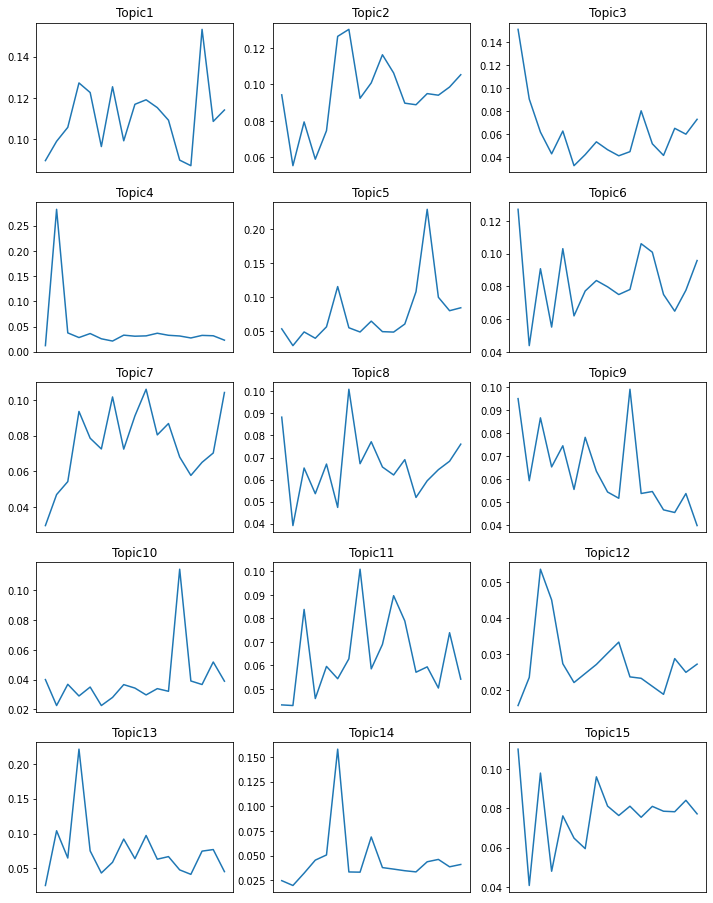

In [41]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16)) 
for col, ax in zip(trend.columns.tolist(), axes.ravel()): 
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()